In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("data/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


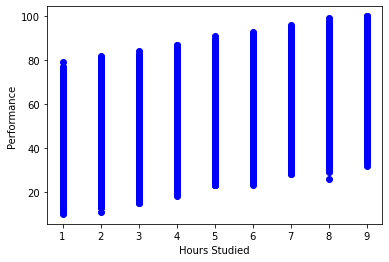

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df["Hours Studied"], df["Performance Index"],  color='blue')
plt.xlabel("Hours Studied")
plt.ylabel("Performance")
plt.show()

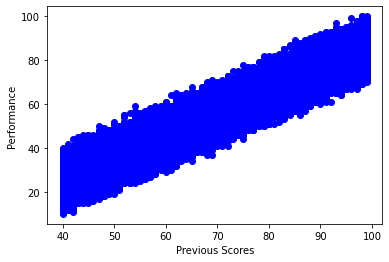

In [8]:
plt.scatter(df["Previous Scores"], df["Performance Index"],  color='blue')
plt.xlabel("Previous Scores")
plt.ylabel("Performance")
plt.show()

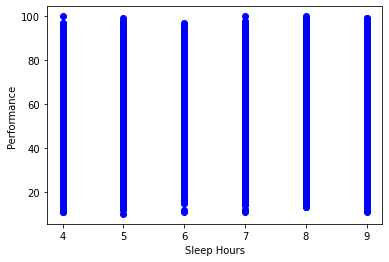

In [11]:
plt.scatter(df["Sleep Hours"], df["Performance Index"],  color='blue')
plt.xlabel("Sleep Hours")
plt.ylabel("Performance")
plt.show()

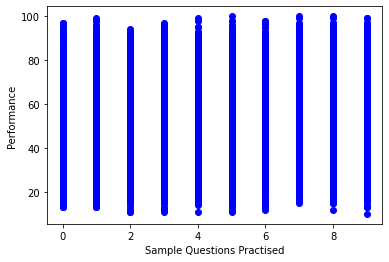

In [12]:
plt.scatter(df["Sample Question Papers Practiced"], df["Performance Index"],  color='blue')
plt.xlabel("Sample Questions Practised")
plt.ylabel("Performance")
plt.show()

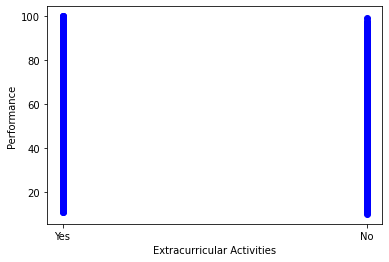

In [13]:
plt.scatter(df["Extracurricular Activities"], df["Performance Index"],  color='blue')
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance")
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [16]:
# hours studied
# previous scores
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Hours Studied','Previous Scores']])
y = np.asanyarray(train[['Performance Index']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[2.85502532 1.01901329]]


In [17]:
y_hat= regr.predict(test[['Hours Studied','Previous Scores']])
x = np.asanyarray(test[['Hours Studied','Previous Scores']])
y = np.asanyarray(test[['Performance Index']])
print("Mean Squared error(MSE): %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared error(MSE): 5.32
Variance score: 0.99
